In [1]:
#Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import pyspark.sql.functions as f
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local") \
    .appName("xpto") \
    .getOrCreate()
sc = spark.sparkContext

In [2]:
# Load file
df = spark.read.csv('creditcard.csv', header=True, inferSchema=True, sep=",")

# Print Schema
df.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [3]:
df.head()

Row(Time=0.0, V1=-1.3598071336738, V2=-0.0727811733098497, V3=2.53634673796914, V4=1.37815522427443, V5=-0.338320769942518, V6=0.462387777762292, V7=0.239598554061257, V8=0.0986979012610507, V9=0.363786969611213, V10=0.0907941719789316, V11=-0.551599533260813, V12=-0.617800855762348, V13=-0.991389847235408, V14=-0.311169353699879, V15=1.46817697209427, V16=-0.470400525259478, V17=0.207971241929242, V18=0.0257905801985591, V19=0.403992960255733, V20=0.251412098239705, V21=-0.018306777944153, V22=0.277837575558899, V23=-0.110473910188767, V24=0.0669280749146731, V25=0.128539358273528, V26=-0.189114843888824, V27=0.133558376740387, V28=-0.0210530534538215, Amount=149.62, Class=0)

In [4]:
#Number of Frauds and non-frauds
classFreq = df.groupBy("Class").count()
classFreq.show()

+-----+------+
|Class| count|
+-----+------+
|    1|   492|
|    0|284315|
+-----+------+



In [5]:
df1= df.toPandas()
df1= df1.sample(frac=1)

In [6]:
df1.shape

(284807, 31)

In [7]:
df1.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int32
dtype: object

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 277053 to 225634
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21  

In [9]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
277053,167435.0,1.979384,0.011758,-2.047312,1.080894,0.896589,-0.312409,0.587391,-0.239297,0.022915,...,0.054892,0.243656,-0.185544,-1.031829,0.559267,-0.453311,-0.032126,-0.074349,53.62,0
86364,61199.0,-0.735589,0.910408,1.629258,-0.049103,0.388434,-0.021505,0.767065,-0.067321,-0.282026,...,-0.198790,-0.496126,-0.381410,-0.406477,0.489256,0.336822,-0.128604,0.060854,13.13,0
146698,87830.0,-0.689402,0.733363,0.614486,-0.643575,0.238539,0.667033,-0.235594,0.635210,0.227715,...,0.364567,1.060081,-0.428177,-1.336314,-0.115950,-0.070150,-0.049746,0.083862,6.43,0
81088,58779.0,-0.807958,-0.882040,0.153447,-1.929140,0.781248,-0.073457,0.444134,-0.282330,-0.900027,...,-0.638346,-0.874115,0.717802,-1.425325,-1.119995,0.539491,-0.066475,-0.150501,54.94,0
239656,150207.0,1.478356,-0.576537,-2.218772,1.012267,1.213661,0.804870,0.709900,0.027990,-0.402869,...,0.278438,0.464599,-0.154726,-1.623625,0.099996,-0.508904,-0.019160,-0.043267,240.00,0


In [10]:
#Check missing data
check_missing=df1.isnull().sum()*100/df1.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [11]:
#statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.177456e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.379486e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.399994e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.093854e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.004964e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.496195e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.629815e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.146745e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.413241e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Distribution of the Classes in the dataset
0    0.998273
1    0.001727
Name: Class, dtype: float64


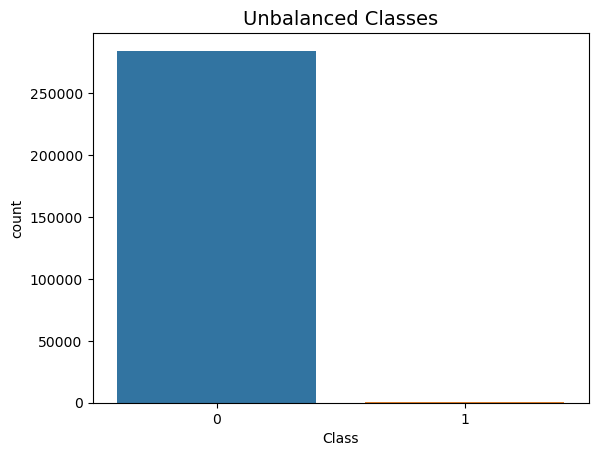

In [12]:
#Plot Distribution of the Classes
print('Distribution of the Classes in the dataset')
print(df1['Class'].value_counts()/len(df1))

sns.countplot(x ='Class', data=df1)
plt.title('Unbalanced Classes', fontsize=14)
plt.show()

## Imbalanced Data

In [56]:
# amount of fraud classes 492 rows.
fraud_df = df1.loc[df1['Class'] == 1]
non_fraud_df = df1.loc[df1['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.shape

(984, 31)

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


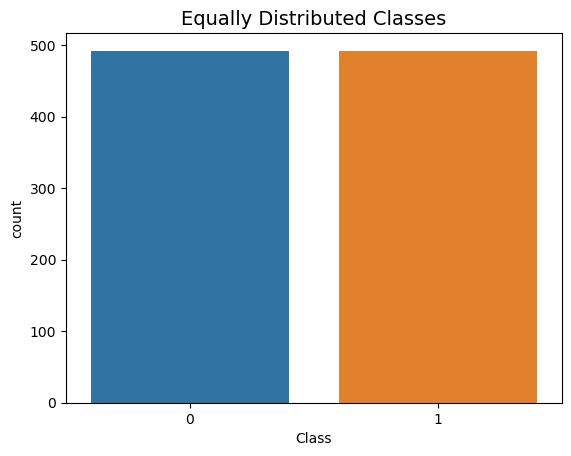

In [57]:
#Plot Distribution of the Classes
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x ='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

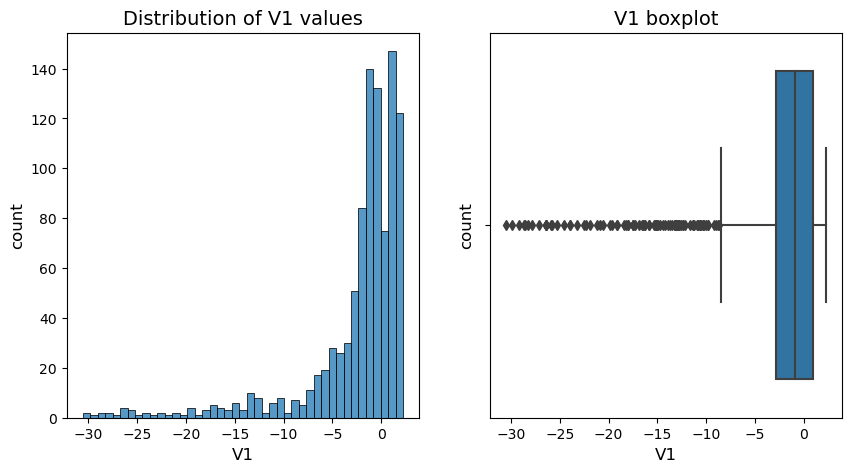

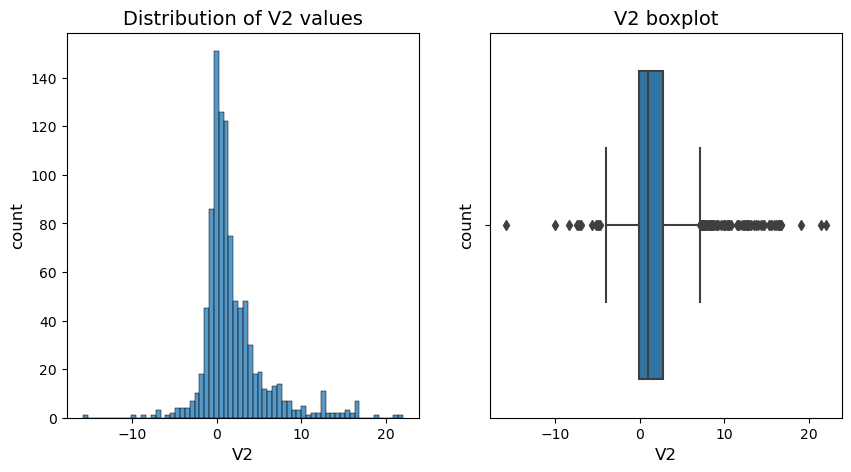

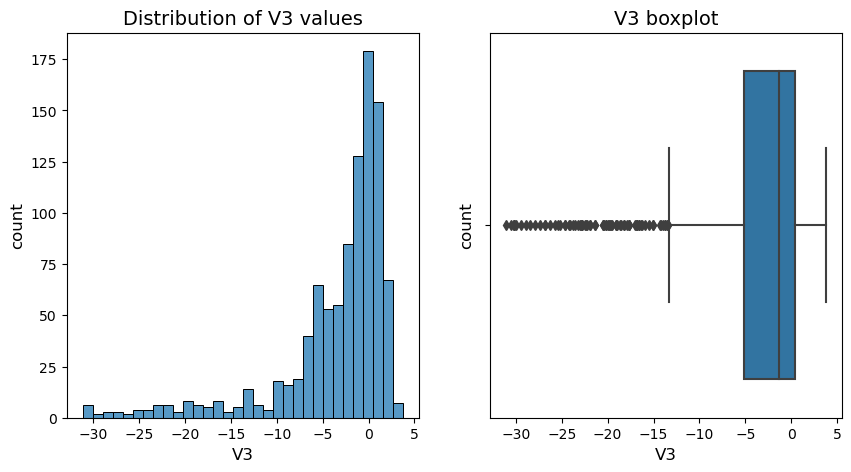

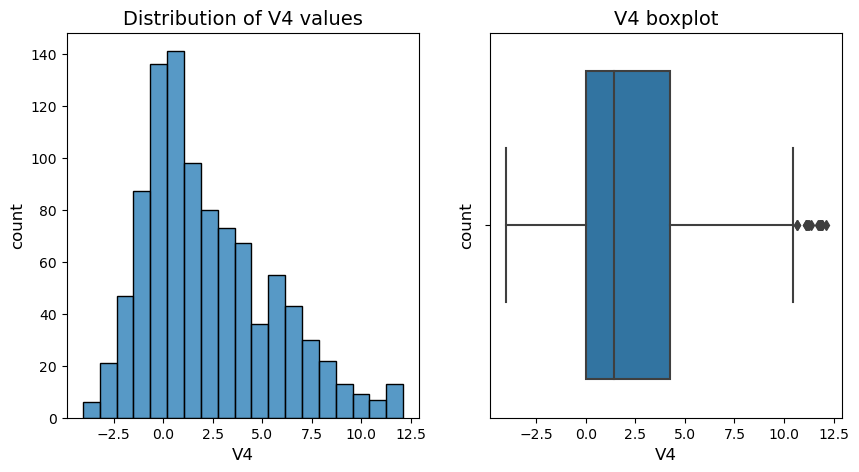

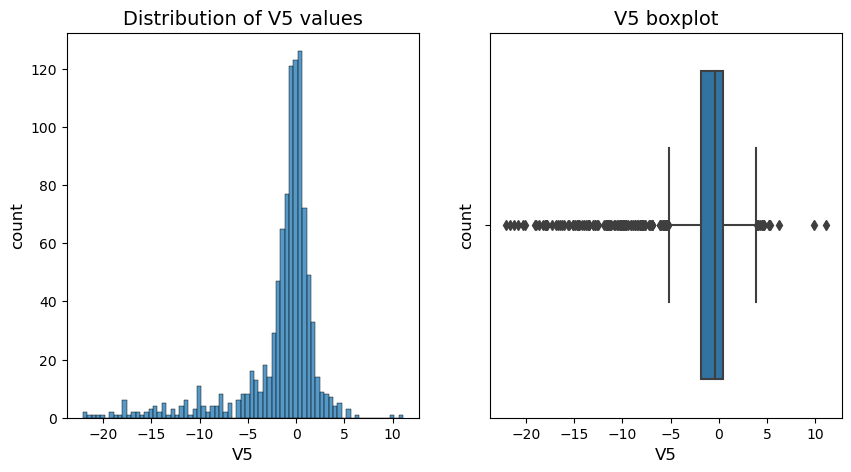

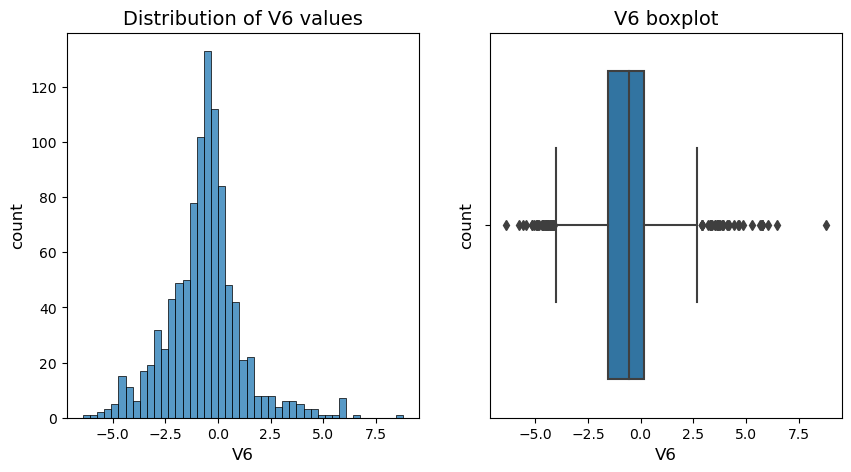

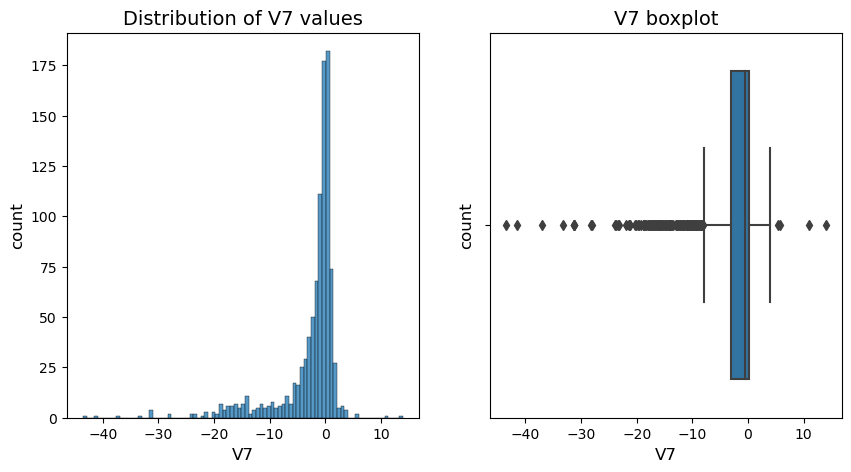

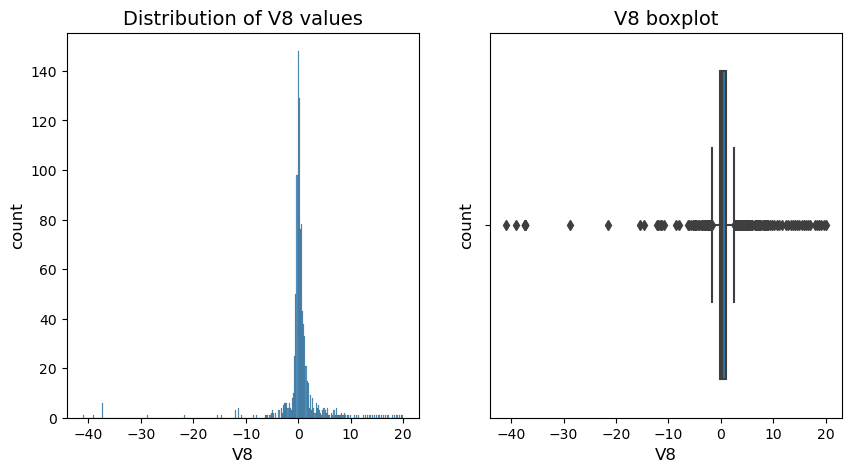

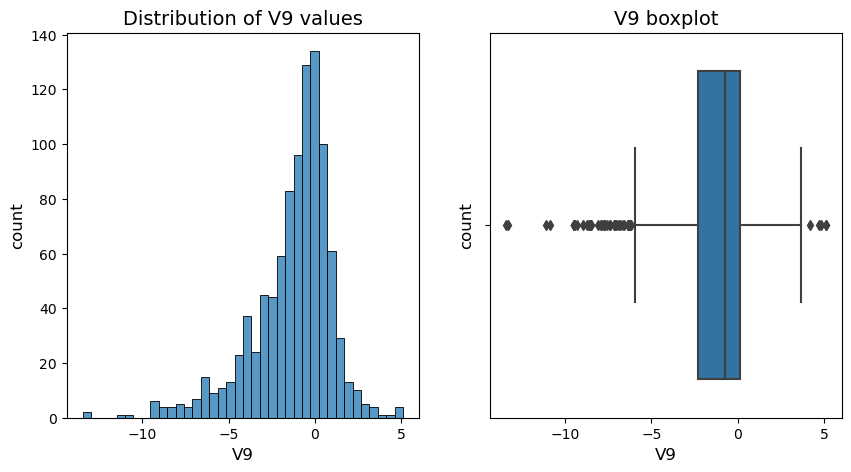

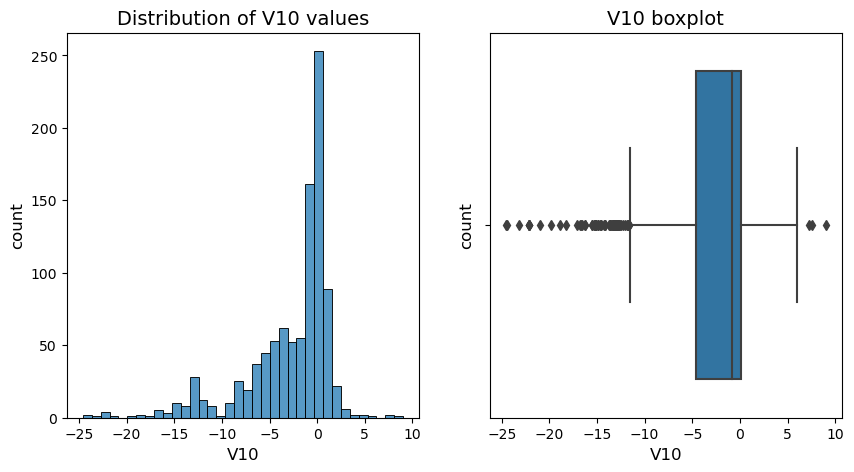

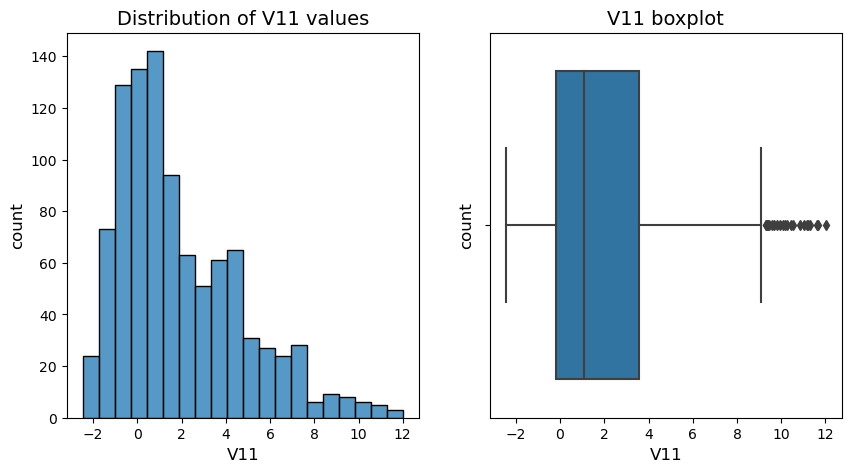

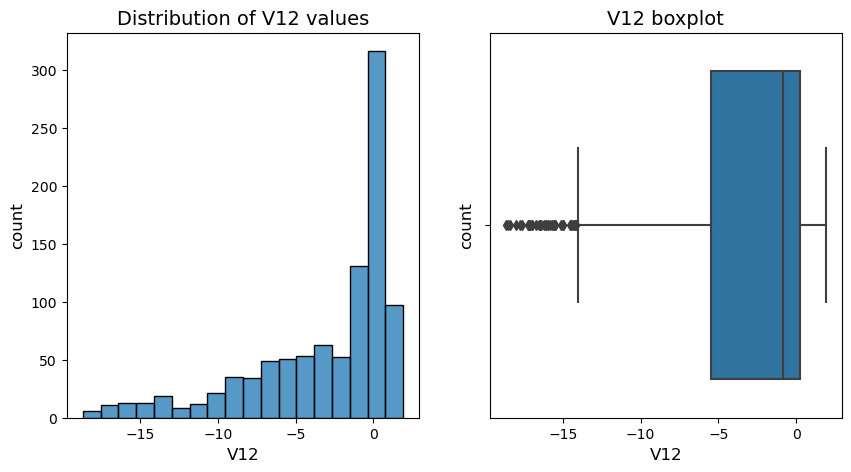

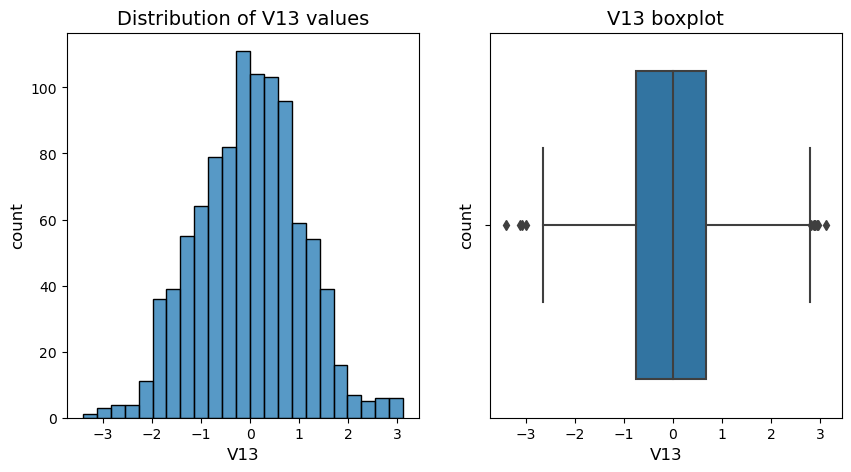

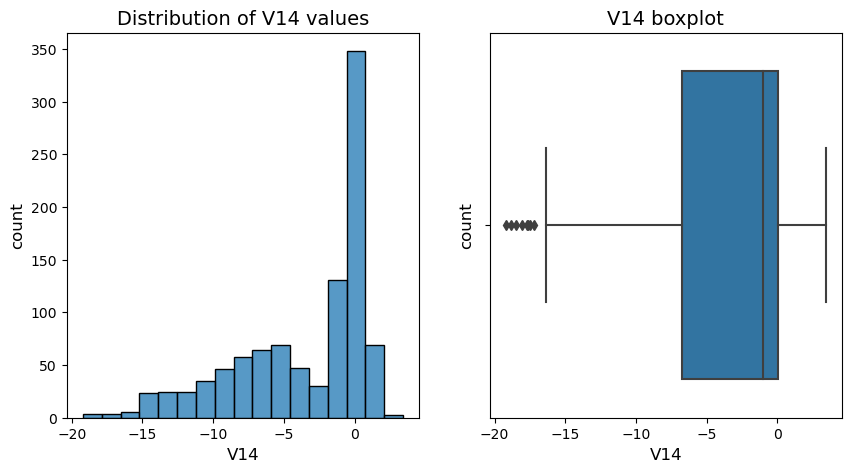

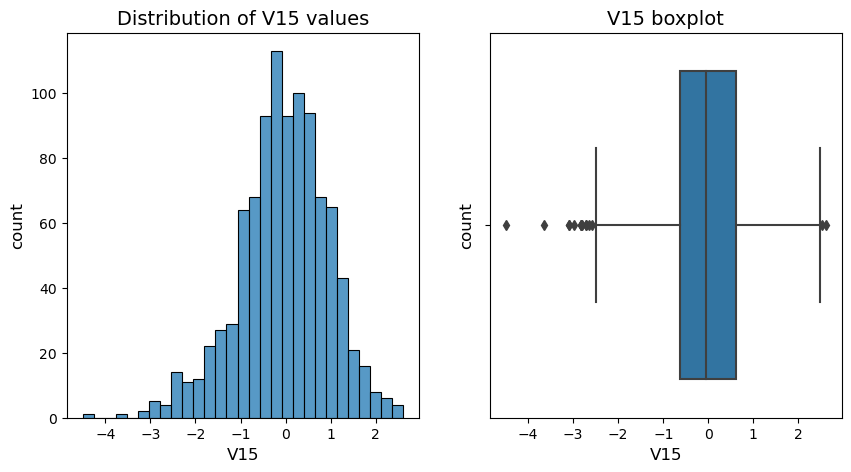

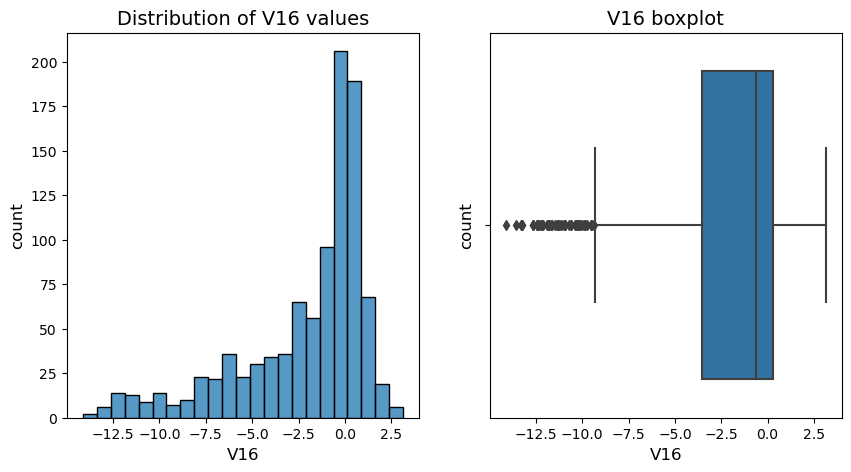

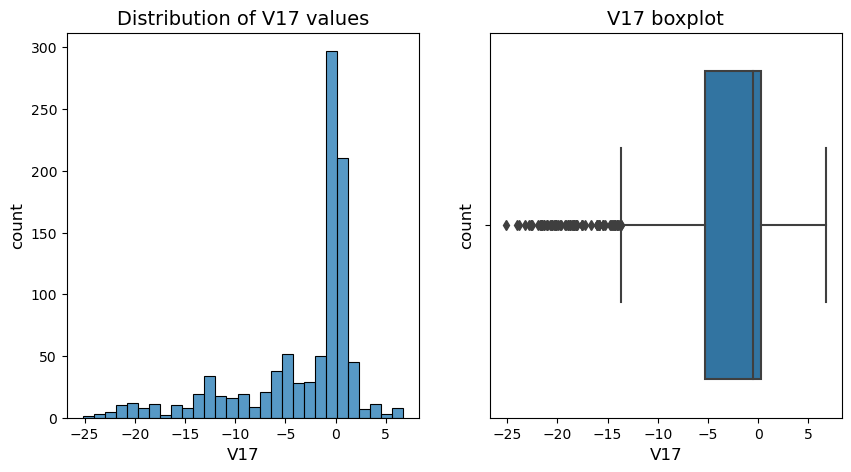

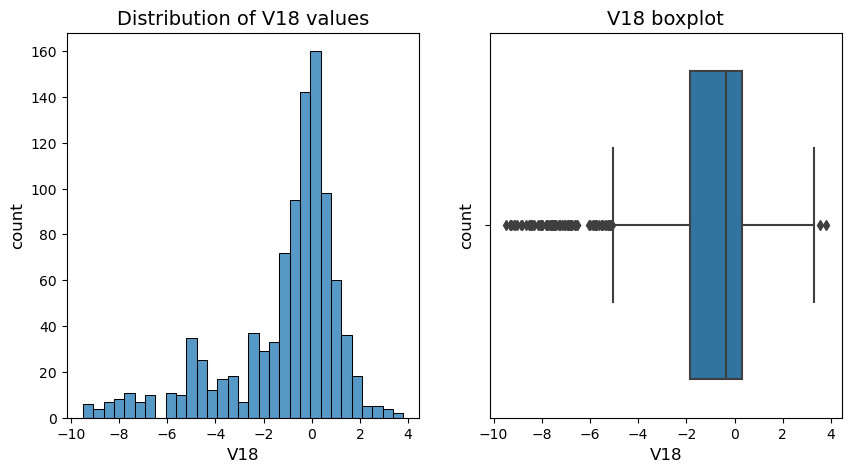

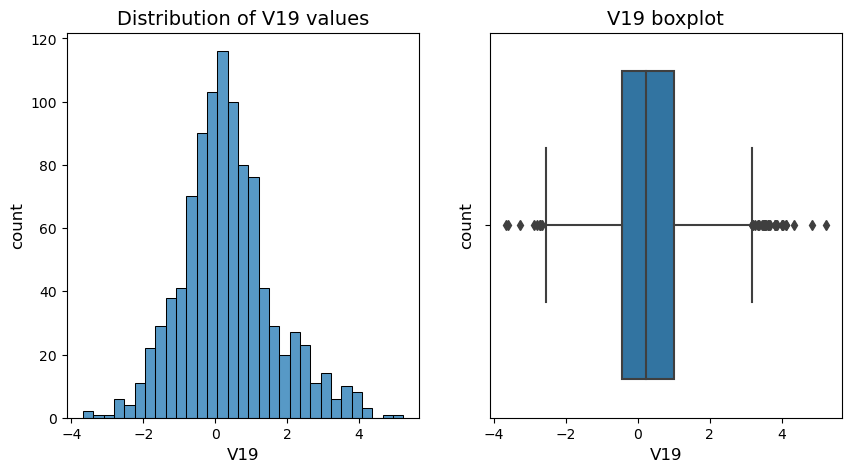

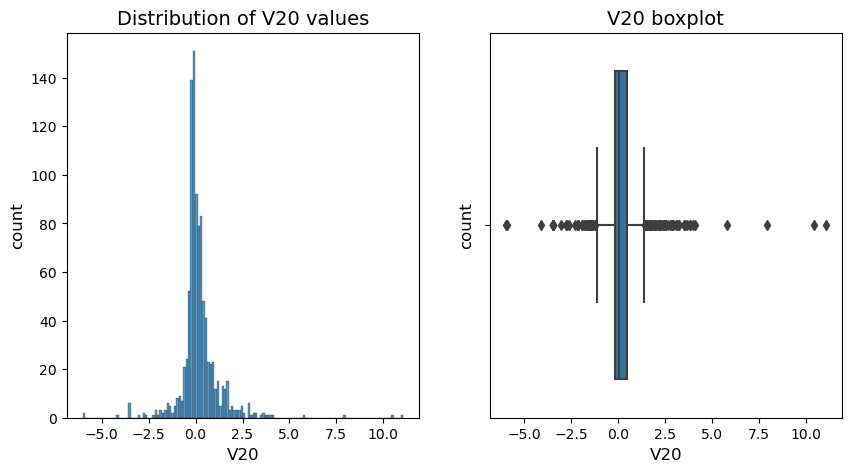

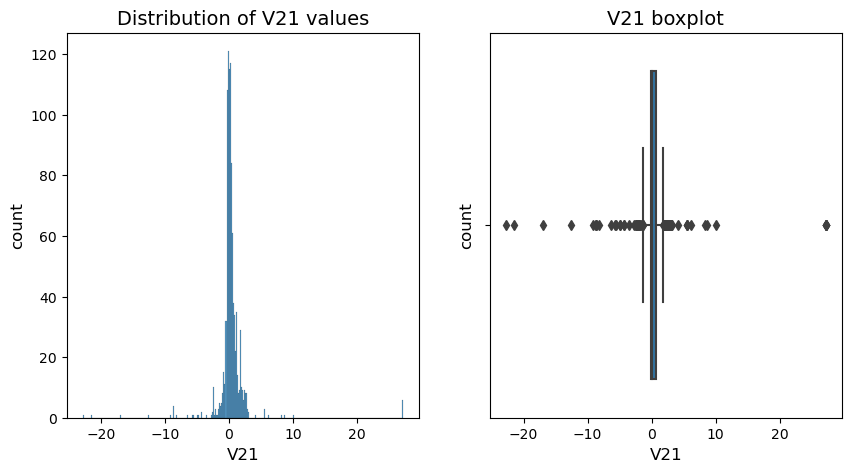

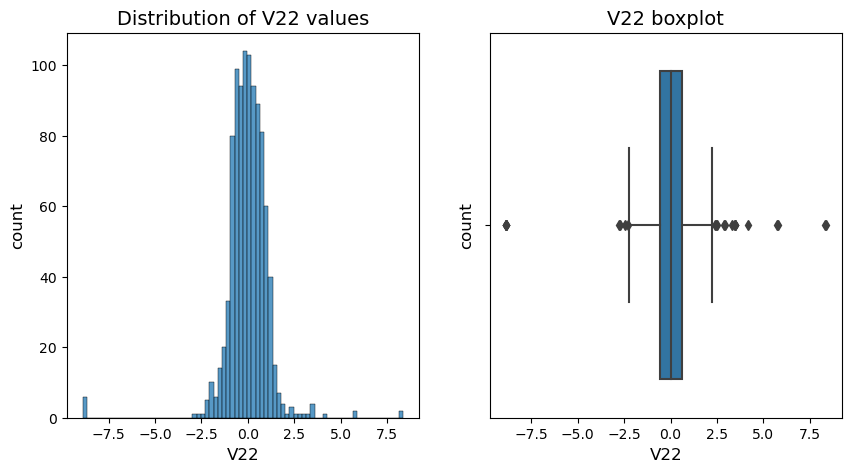

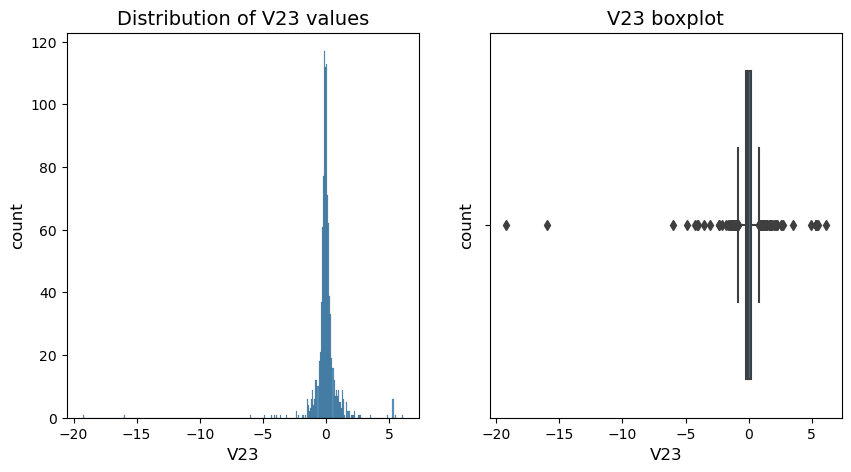

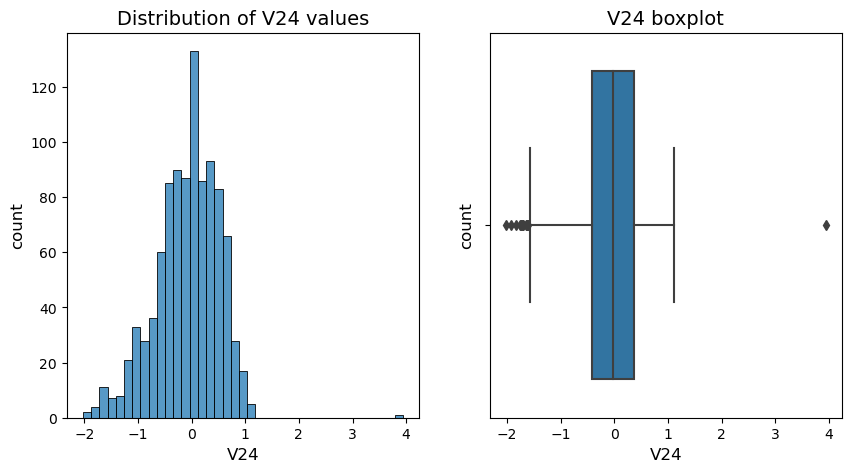

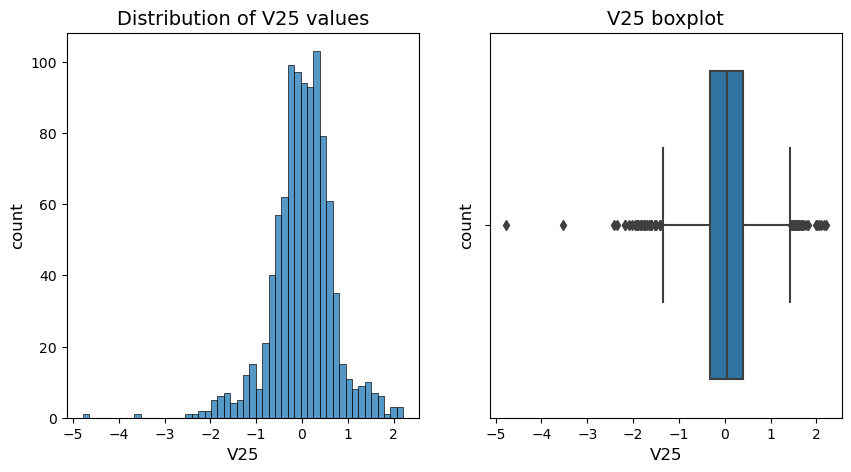

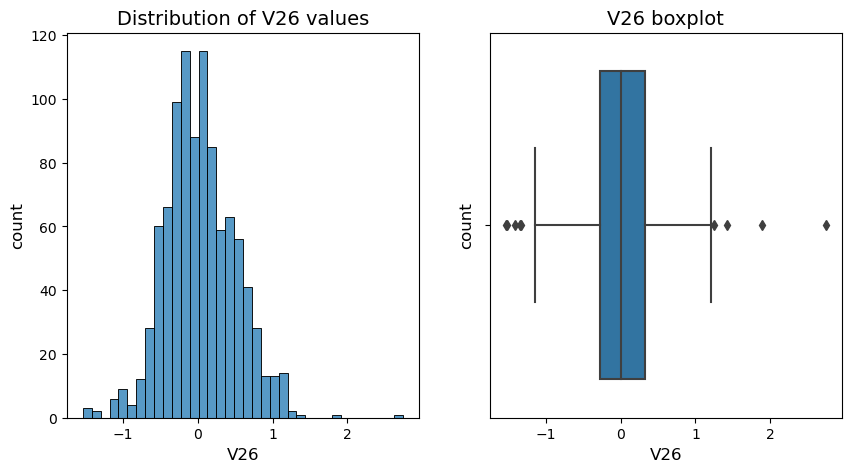

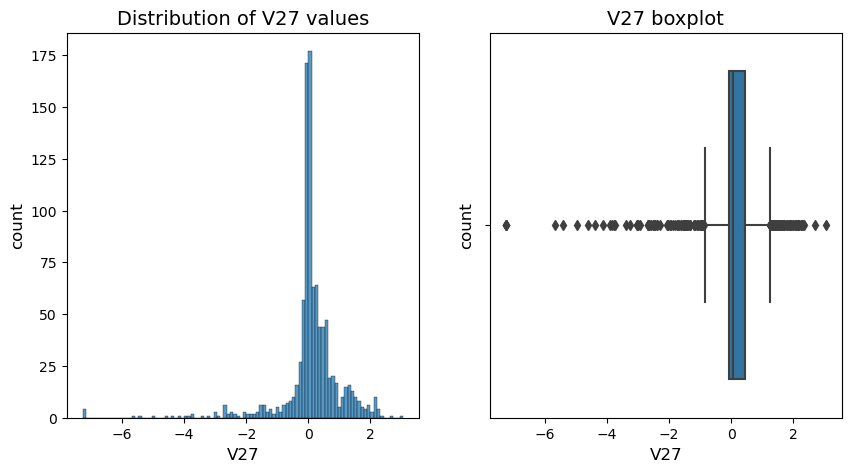

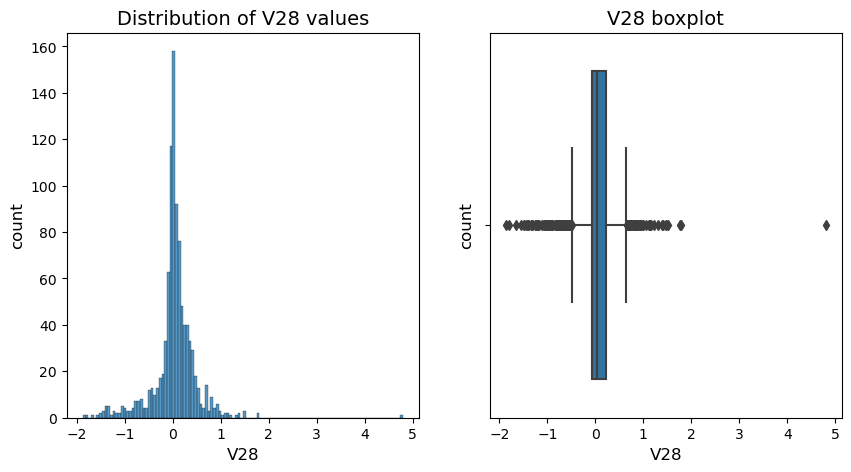

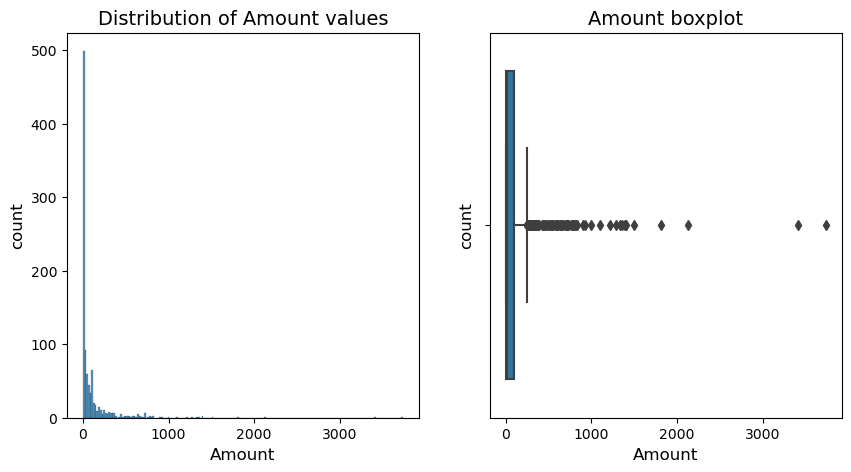

In [58]:
#Histogram distribution
for i in new_df.loc[:, ~new_df.columns.isin(['Time','Class'])]:
    plt.figure(figsize = [10,5]);
    plt.subplot(1,2,1);
    sns.histplot(new_df [i]);
    plt.title('Distribution of {} values'.format(i) , size = 14);
    plt.xlabel(i , size = 12);
    plt.ylabel("count", size = 12);
    
    plt.subplot(1,2,2);
    sns.boxplot(data = new_df, x = i);
    plt.title('{} boxplot'.format(i) , size = 14);
    plt.xlabel(i , size = 12);
    plt.ylabel("count", size = 12);
    plt.show()

In [60]:
#Normality checking
def is_normal(x, treshhold = 0.05):
    k2,p = stats.normaltest(x)
    print(p)
    print(p > treshhold)
    print('\n')
    return p > treshhold

for name in list(new_df.loc[:, ~new_df.columns.isin(['Time','Class'])]):
    is_normal(np.array(new_df[name]))

5.569178902758508e-120
False


1.2160331928016542e-82
False


7.904215979924355e-97
False


2.9394587092609606e-19
False


1.7180420319252646e-104
False


1.9527919496377526e-23
False


2.540241657079439e-128
False


1.5541930517443883e-189
False


1.7340105231718925e-52
False


1.1549312191357932e-71
False


9.34673365768819e-31
False


4.6374899702305045e-46
False


0.9848247285629855
True


2.909239943142201e-27
False


3.5703878922552356e-09
False


1.2988872038479094e-47
False


4.400932182953568e-55
False


5.1269117963834914e-49
False


2.4325082425519765e-10
False


2.017101908139703e-133
False


2.1707422921535987e-208
False


1.9156152854277298e-106
False


7.9203387712016e-286
False


2.2669156489055736e-13
False


1.099138820582027e-36
False


1.7627724813455543e-10
False


4.894916281355532e-136
False


1.8752432482989888e-61
False


4.834190791012724e-280
False




In [61]:
# Check skeness
new_df.loc[:, ~new_df.columns.isin(['Time','Class'])].skew()

V1       -2.608059
V2        1.724775
V3       -2.186007
V4        0.804532
V5       -2.285959
V6        0.522213
V7       -2.702623
V8       -3.744680
V9       -1.269587
V10      -1.699413
V11       1.039067
V12      -1.365365
V13      -0.012984
V14      -1.019156
V15      -0.429780
V16      -1.386716
V17      -1.517179
V18      -1.375570
V19       0.451093
V20       2.204282
V21       3.961959
V22      -1.505092
V23      -6.734368
V24      -0.204840
V25      -0.683021
V26       0.331112
V27      -2.627768
V28       0.606338
Amount    6.918684
dtype: float64

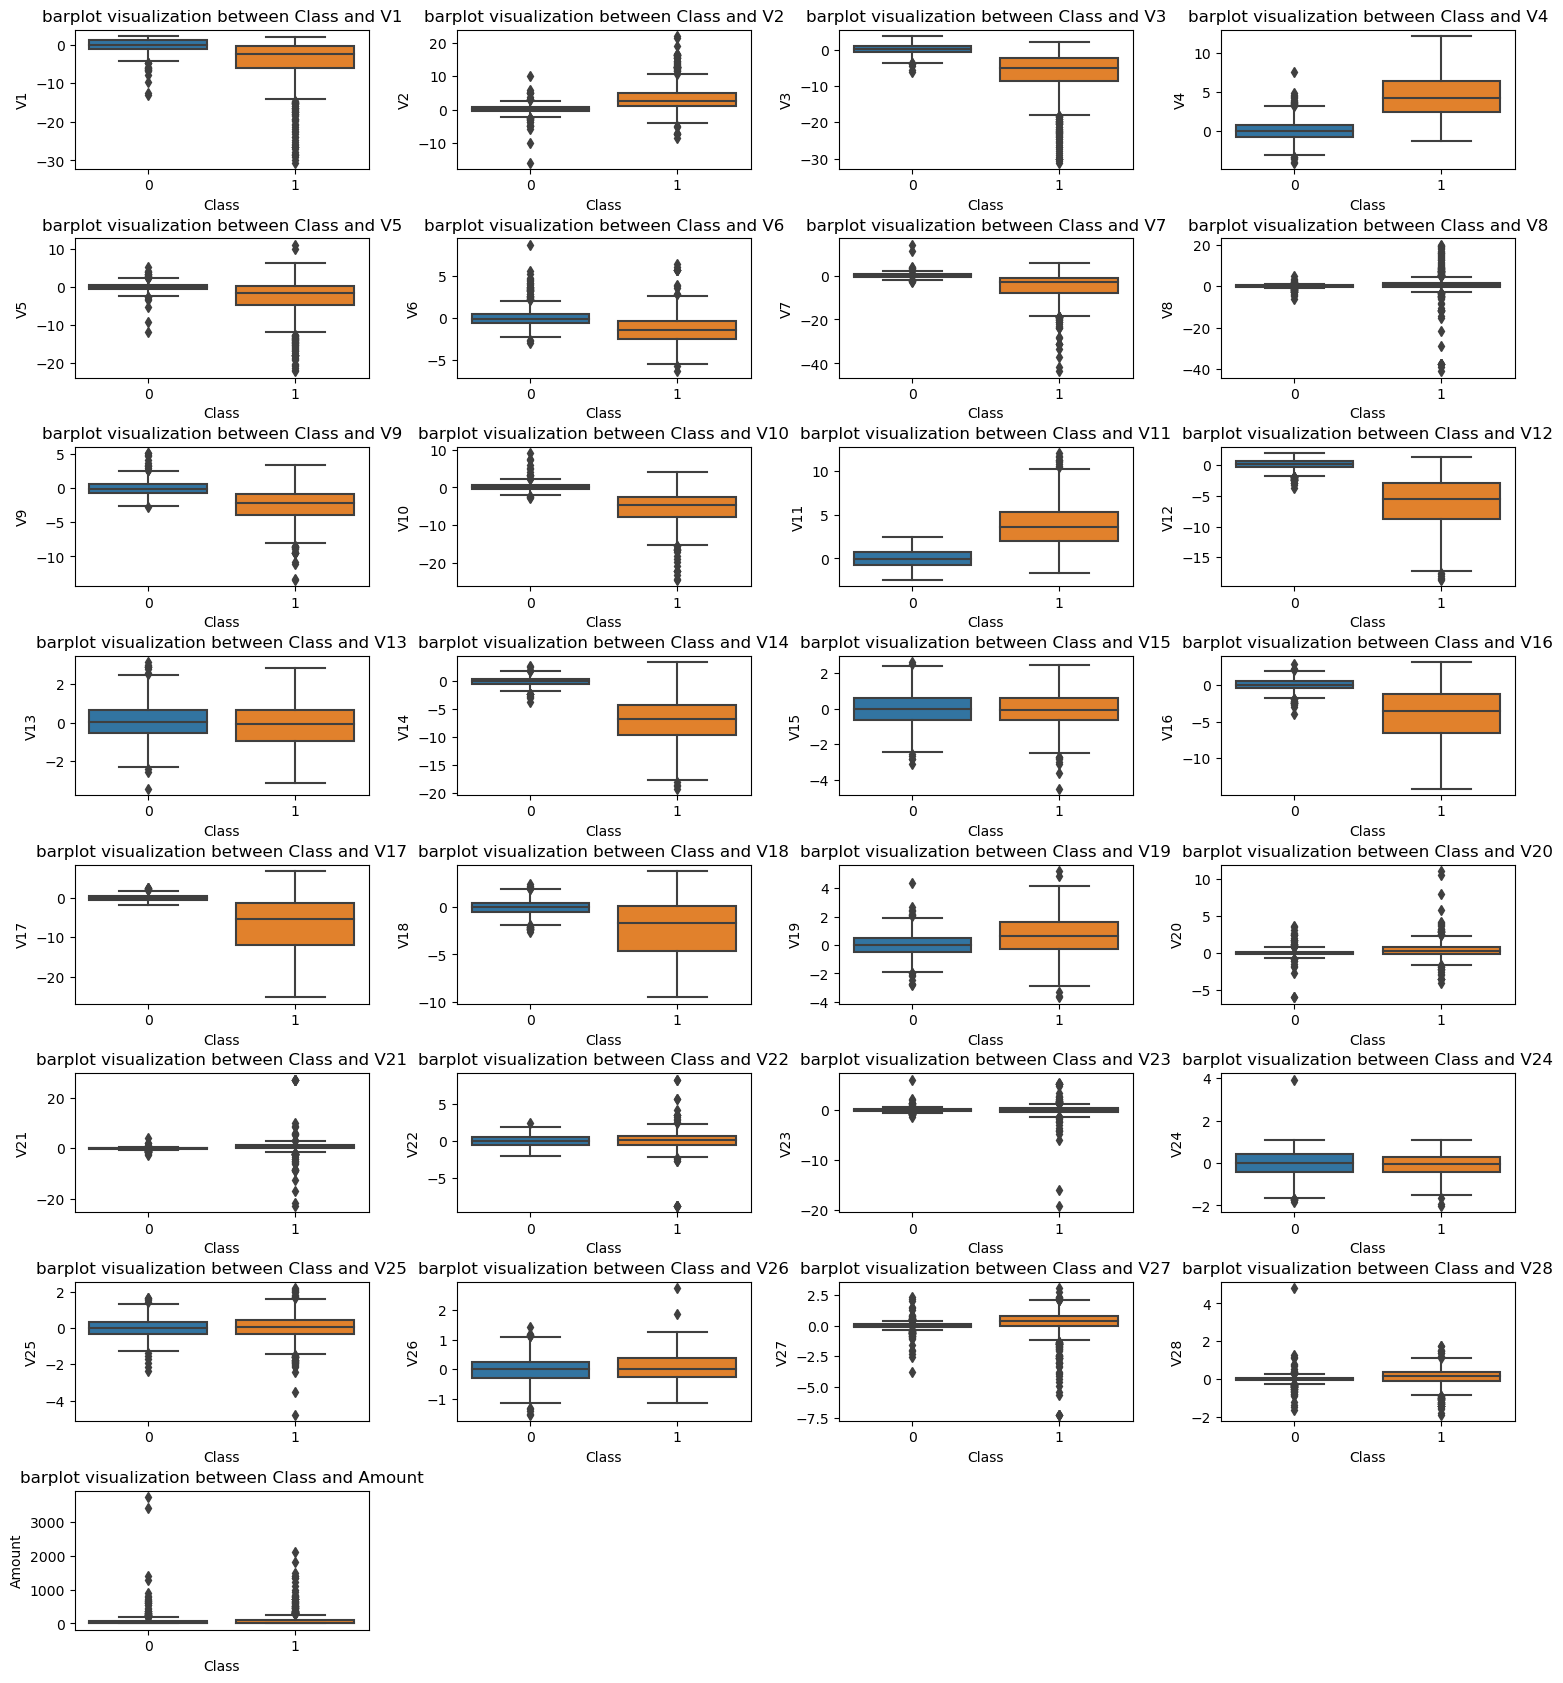

In [62]:
# Visualization of the relation between each variable and Class
x = 0
plt.figure(figsize = [18,20]);
for i in new_df.loc[:, ~new_df.columns.isin(['Time','Class'])] :
    plt.subplot(8,4,x+1)
    sns.boxplot(data = new_df, x = 'Class', y = i)
    plt.title("barplot visualization between Class and {}".format(i), size = 12);
    x = x +1
    plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.3,  
                    hspace=0.5) 
plt.show()

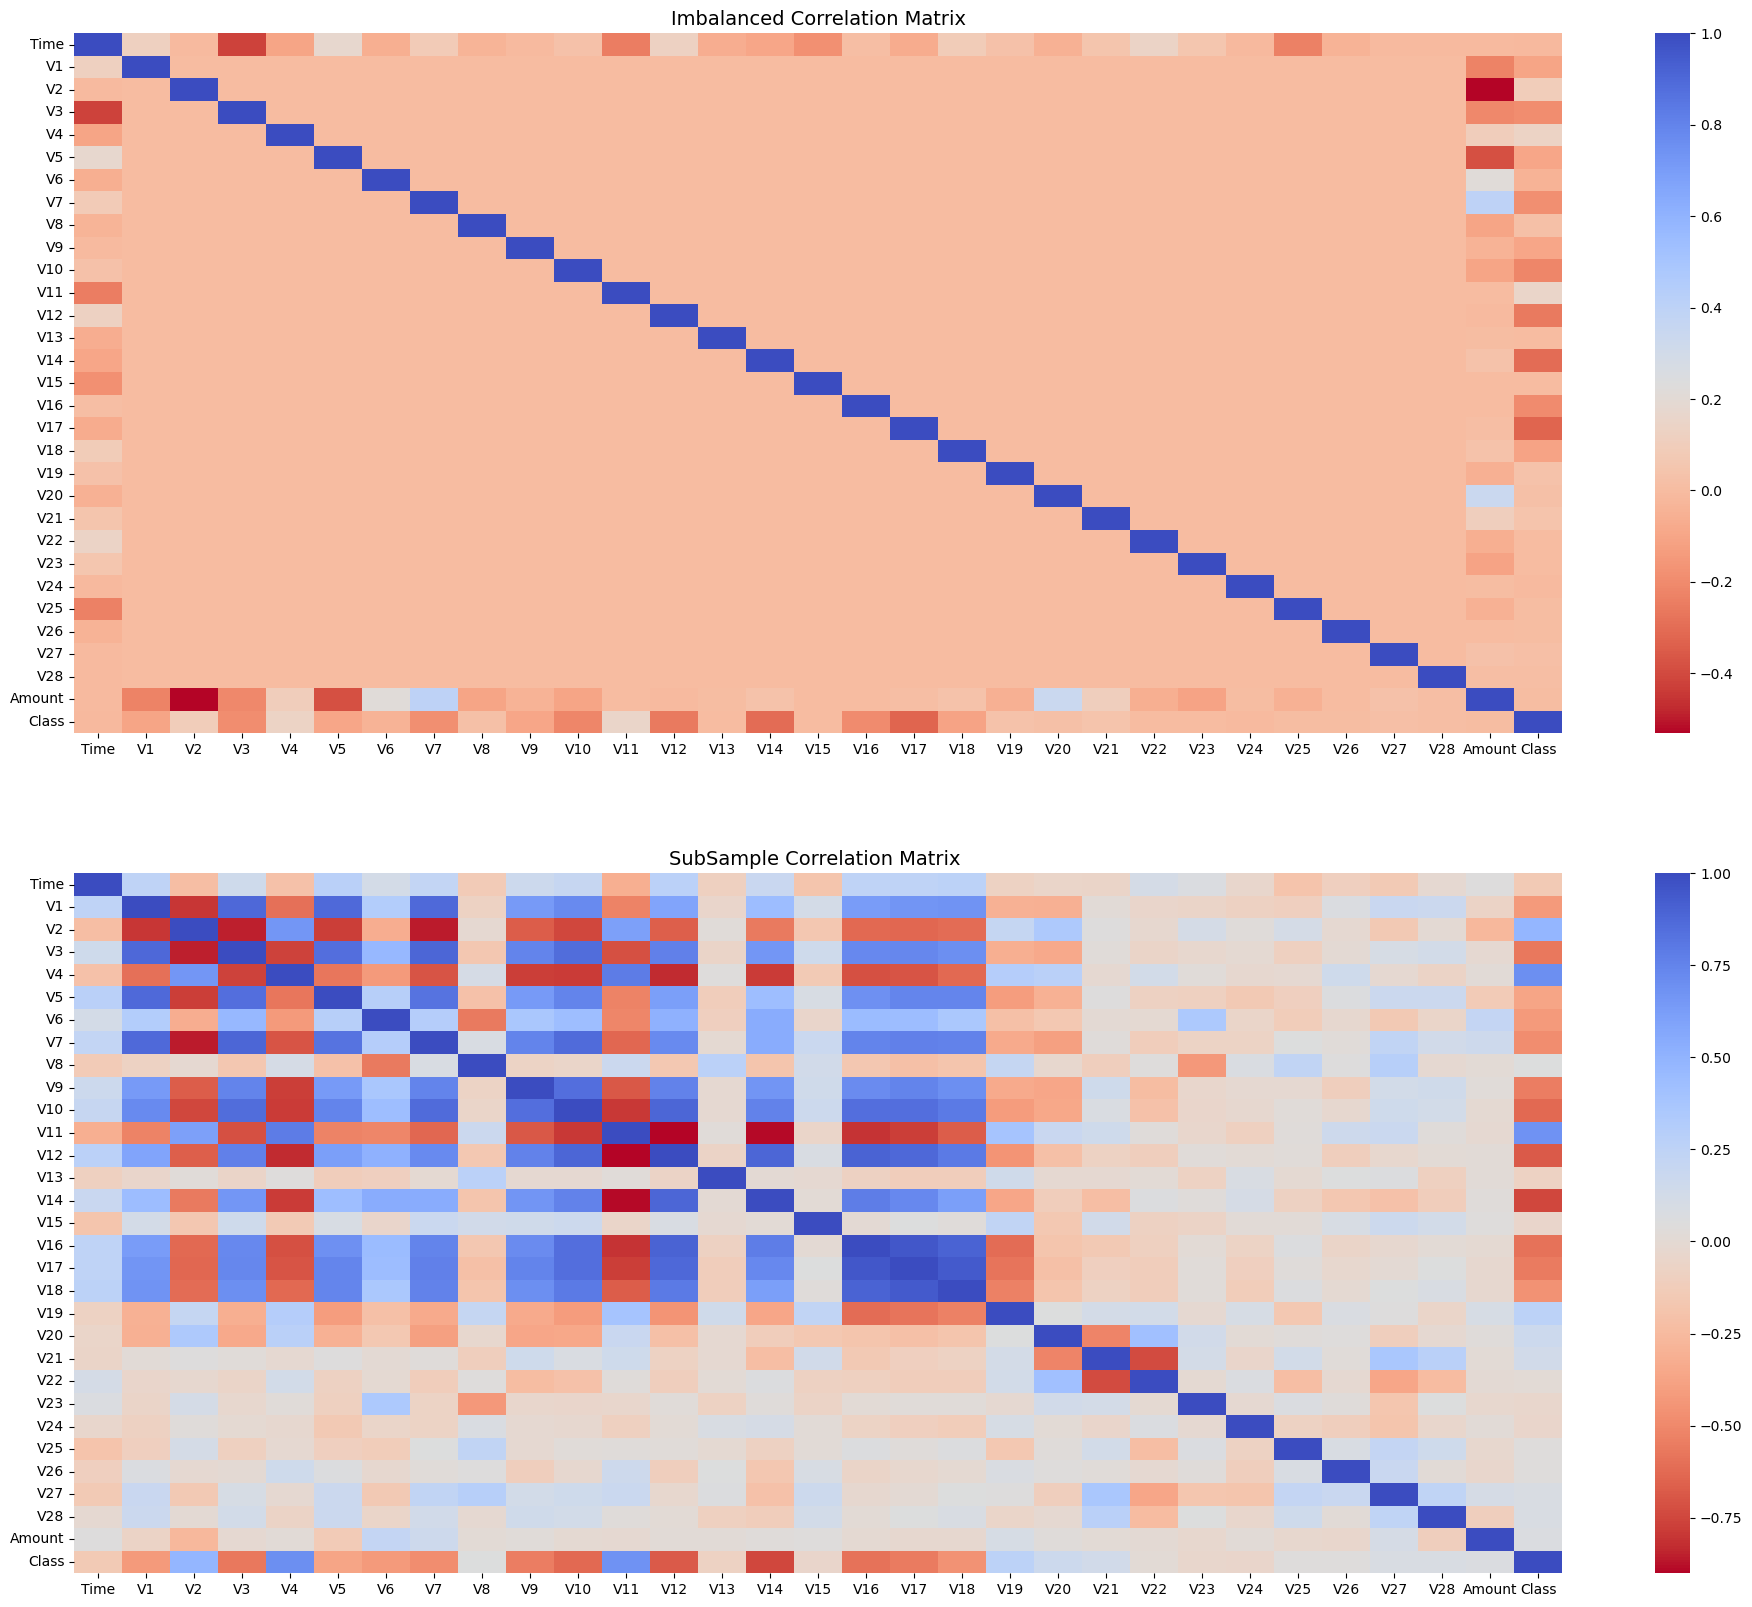

In [63]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix ', fontsize=14)
plt.show()

In [64]:
print('Sorted Correlation values with Class:')
print(new_df[new_df.columns[1:]].corr()['Class'][:-1].sort_values())

Sorted Correlation values with Class:
V14      -0.748284
V12      -0.685402
V10      -0.630570
V16      -0.592292
V3       -0.571702
V17      -0.558623
V9       -0.547925
V7       -0.480444
V18      -0.456817
V1       -0.425314
V6       -0.424240
V5       -0.372013
V13      -0.083377
V24      -0.044004
V15      -0.040973
V23      -0.033214
V22       0.009639
V25       0.038169
V26       0.039452
V8        0.052892
Amount    0.065271
V28       0.082277
V27       0.084485
V21       0.137350
V20       0.167147
V19       0.263558
V2        0.482366
V11       0.687020
V4        0.700758
Name: Class, dtype: float64


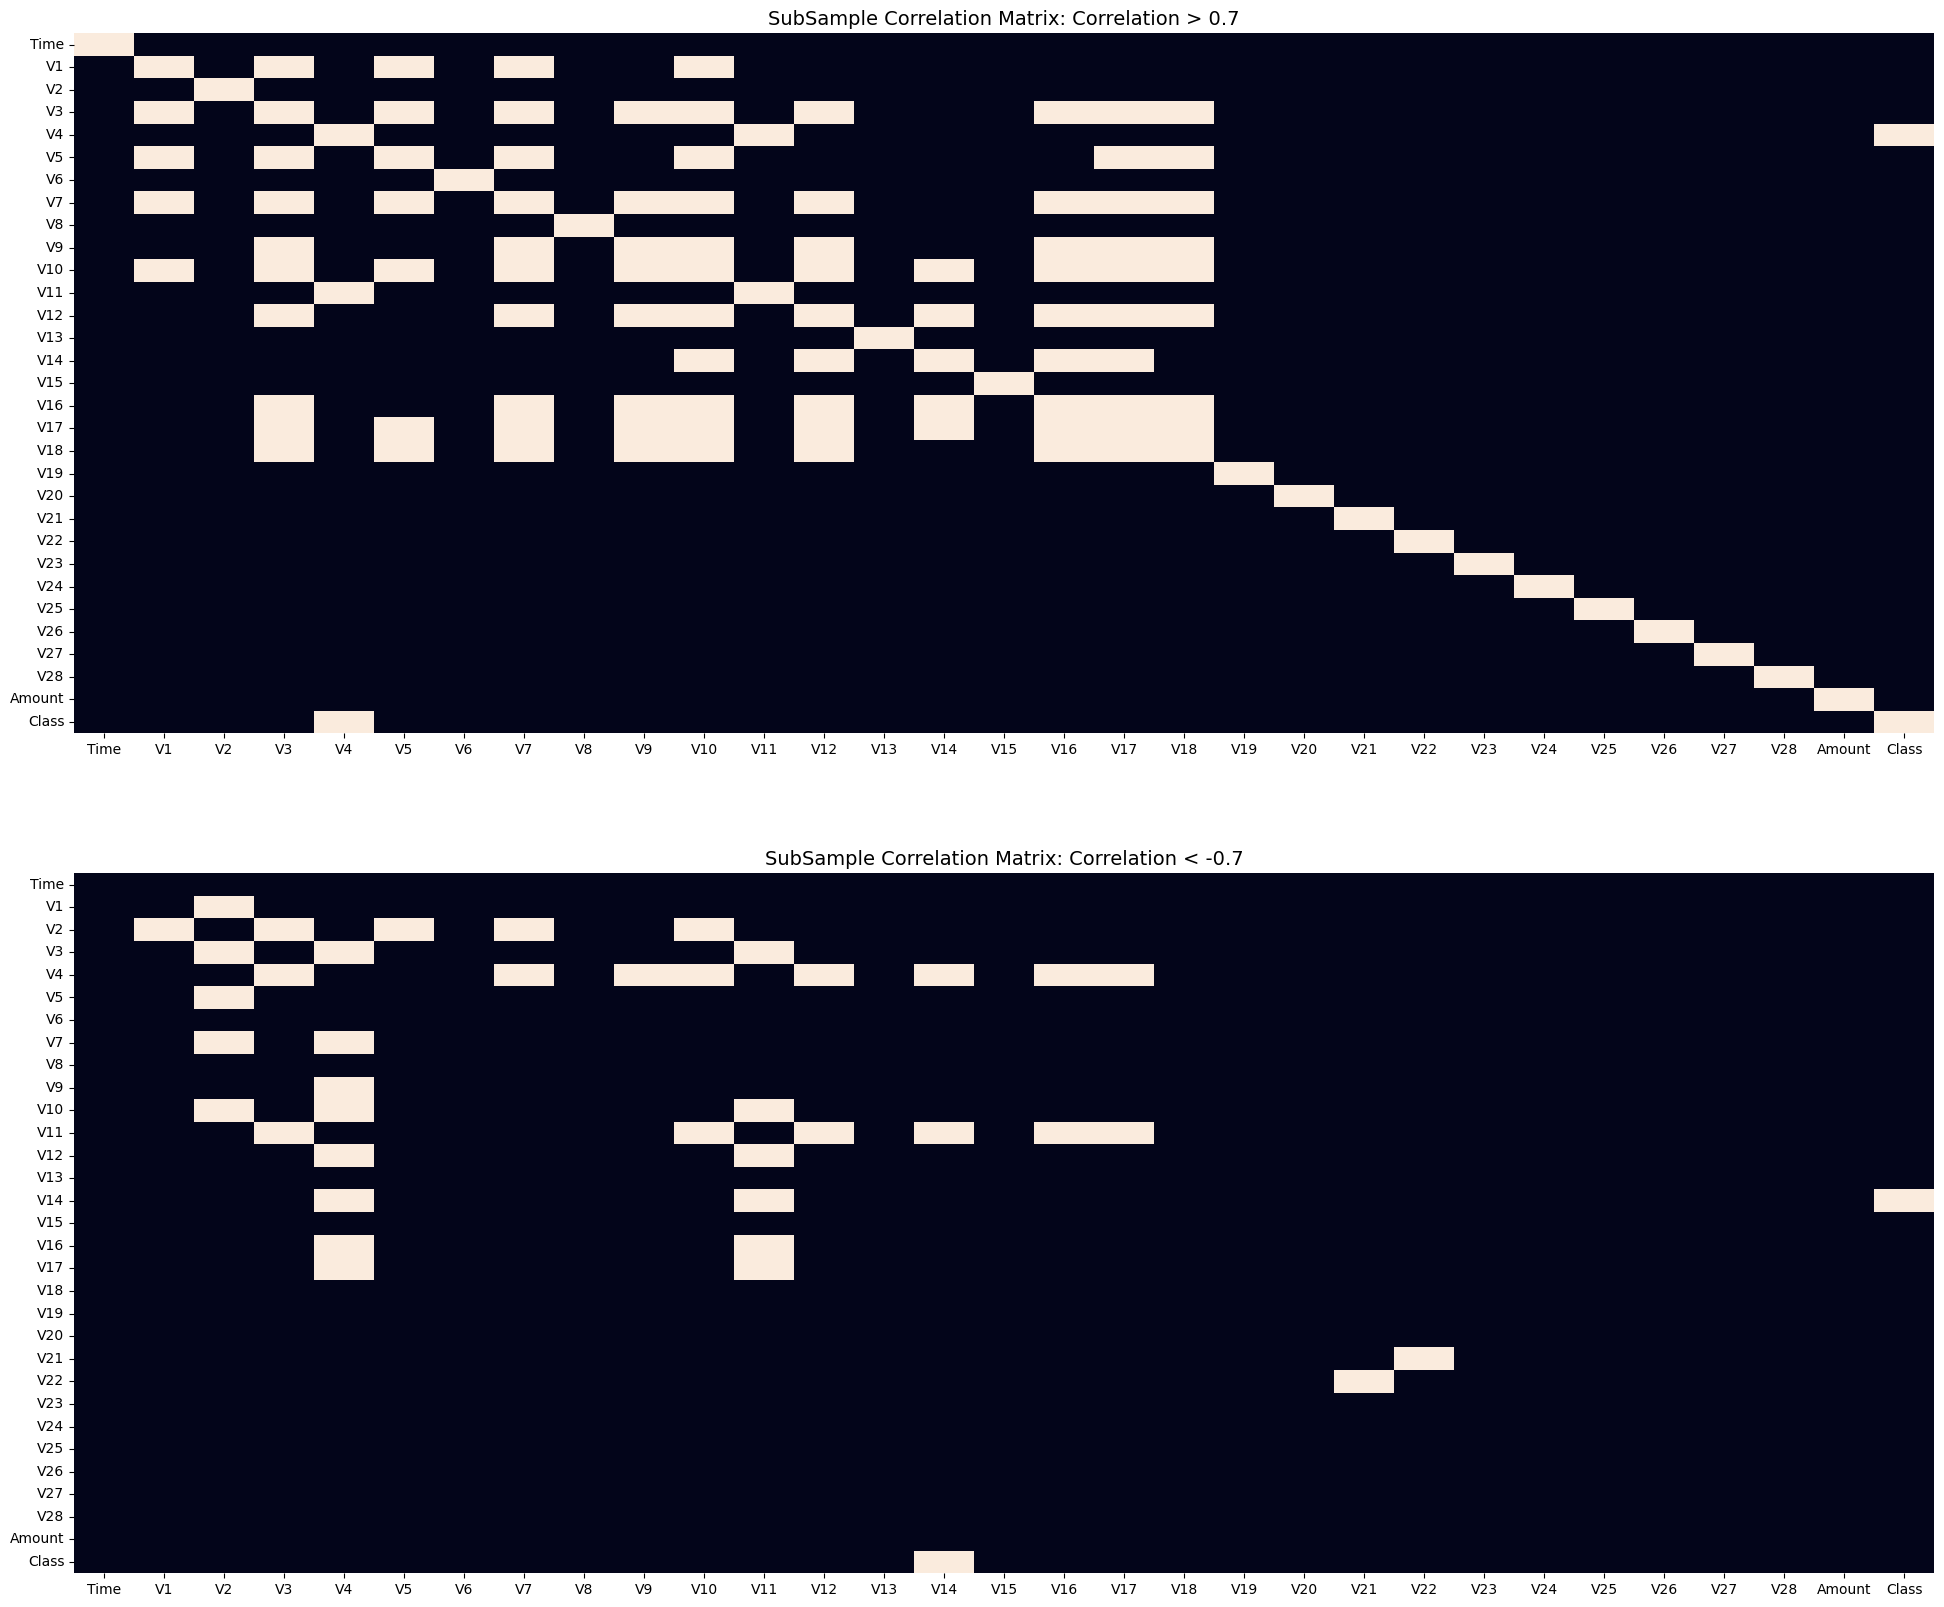

In [65]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr > 0.7, cbar=False, annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix: Correlation > 0.7', fontsize=14)

sns.heatmap(sub_sample_corr <-0.7,  cbar=False, annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix: Correlation < -0.7', fontsize=14)
plt.show()

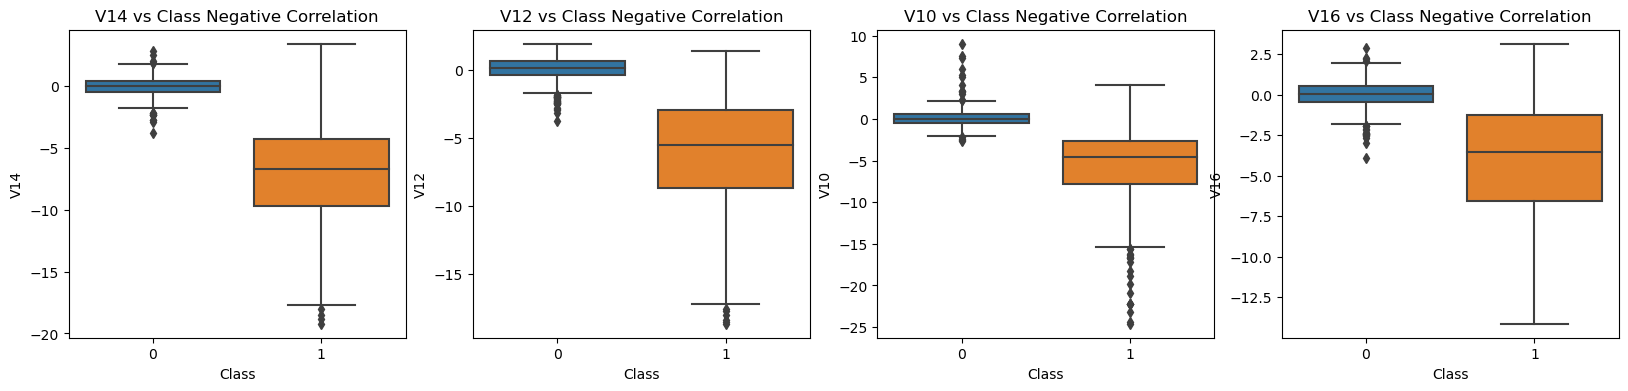

In [66]:
#Bivariate Analysis
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V14", data=new_df,  ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df,  ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=new_df, ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

plt.show()

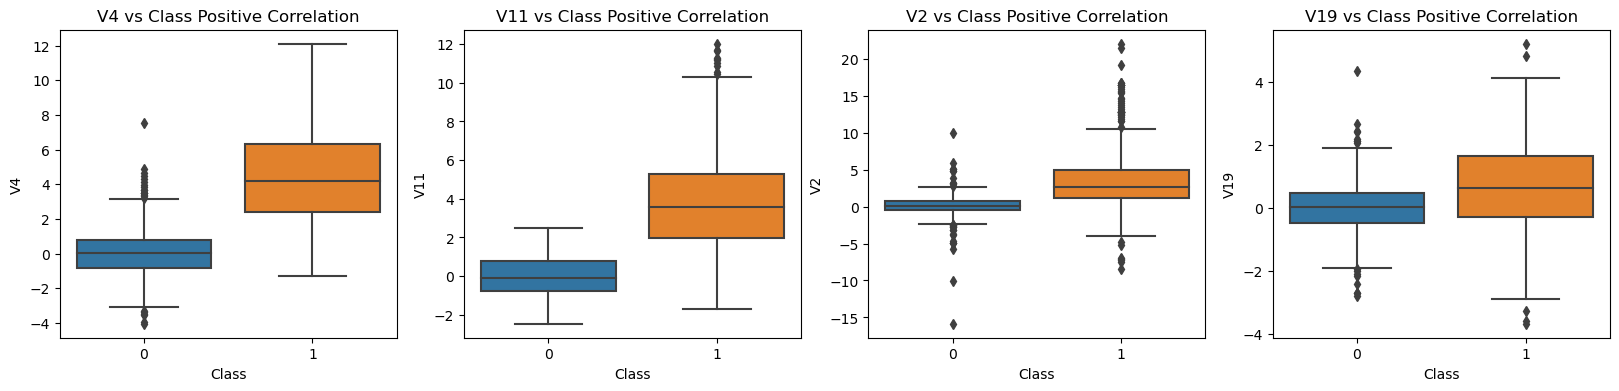

In [67]:
#Bivariate Analysis
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V4", data=new_df,  ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df,  ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

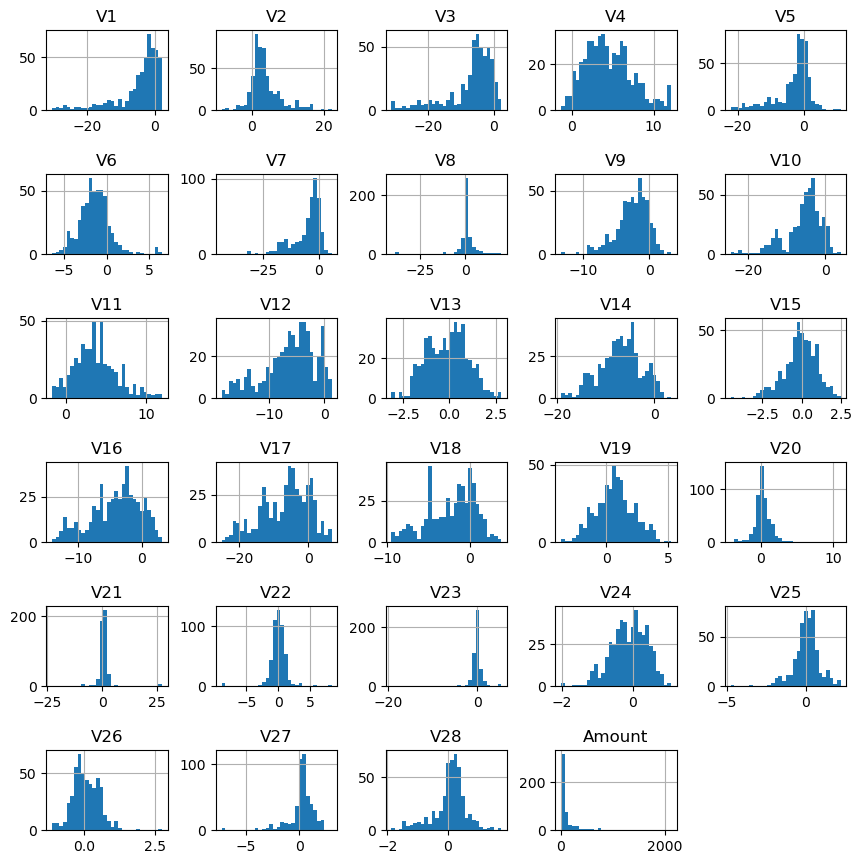

In [68]:
#Histogram distribution if is Fraud
new_df.loc[:, ~new_df.columns.isin(['Time','Class'])].loc[new_df['Class'] == 1].hist(bins=30, figsize=(10, 10))
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.8) 
plt.show()

In [69]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from collections import OrderedDict
corrs = OrderedDict([(col, pearsonr(new_df[col], new_df['Class'] == 1)) for col in new_df.loc[:, ~new_df.columns.isin(['Time','Class'])]])
corrs = pd.DataFrame(index = corrs.keys(), data={
        'corr_coef': [corr[0] for corr in corrs.values()],
        'p_value': [corr[1] for corr in corrs.values()],
    })

corrs.applymap(lambda xx : abs(xx)).sort_values(by='corr_coef', ascending=False).rename(columns={
        'corr_coef': 'absolute correlation coefficient'
    })

,absolute correlation coefficient,p_value
V14,0.748284,3.168813e-177
V4,0.700758,3.406908e-146
V11,0.687020,2.416933e-138
V12,0.685402,1.900833e-137
V10,0.630570,3.329994e-110
V16,0.592292,3.214731e-94
V3,0.571702,1.790007e-86
V17,0.558623,7.857555e-82
V9,0.547925,3.480886e-78
V2,0.482366,1.758475e-58


## Outliers

In [51]:
z = np.abs(stats.zscore(new_df.loc[:, ~new_df.columns.isin(['Time','Class'])]))
threshold = 3
df1_new = new_df[(z < 3).all(axis=1)]

df1_new.describe().T 

,count,mean,std,min,25%,50%,75%,max
Time,439.0,94920.396355,46894.369993,171.000000,55708.000000,80596.000000,138964.500000,171839.000000
V1,439.0,0.437500,1.277886,-2.906238,-0.696342,0.795067,1.557462,2.214988
V2,439.0,0.143030,0.823485,-1.985171,-0.419260,0.125984,0.733340,2.618517
V3,439.0,0.202950,1.249099,-3.538255,-0.557099,0.255727,1.124467,3.772857
V4,439.0,0.223777,1.376567,-3.480111,-0.656458,0.264440,0.972881,4.160632
V5,439.0,-0.041004,0.828741,-2.204725,-0.528289,-0.048410,0.434854,2.480043
V6,439.0,-0.199945,0.745568,-2.242250,-0.712001,-0.312409,0.249820,2.622997
V7,439.0,0.083543,0.724090,-1.978742,-0.422768,0.096850,0.528064,2.488003
V8,439.0,0.073053,0.366178,-1.096460,-0.165994,0.018405,0.269831,1.551782
V9,439.0,-0.151578,0.971714,-2.711907,-0.759989,-0.145302,0.489464,2.742280


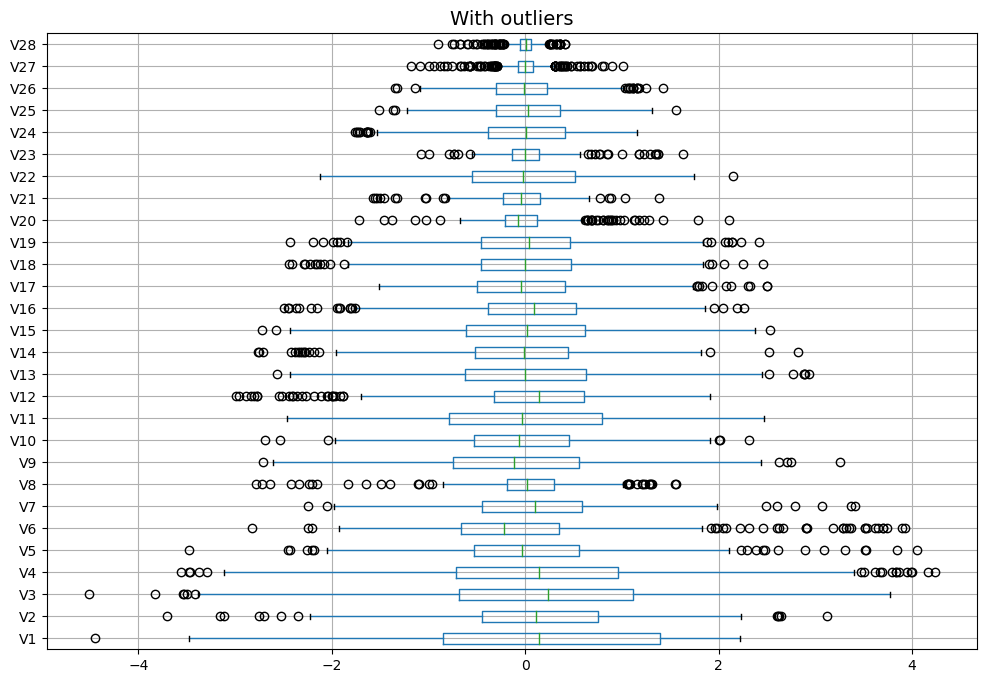

In [52]:
new_df.loc[:, ~new_df.columns.isin(['Amount','Time','Class'])].boxplot( figsize=(12,8), vert=False)
plt.title("With outliers", fontsize=14)
plt.show()

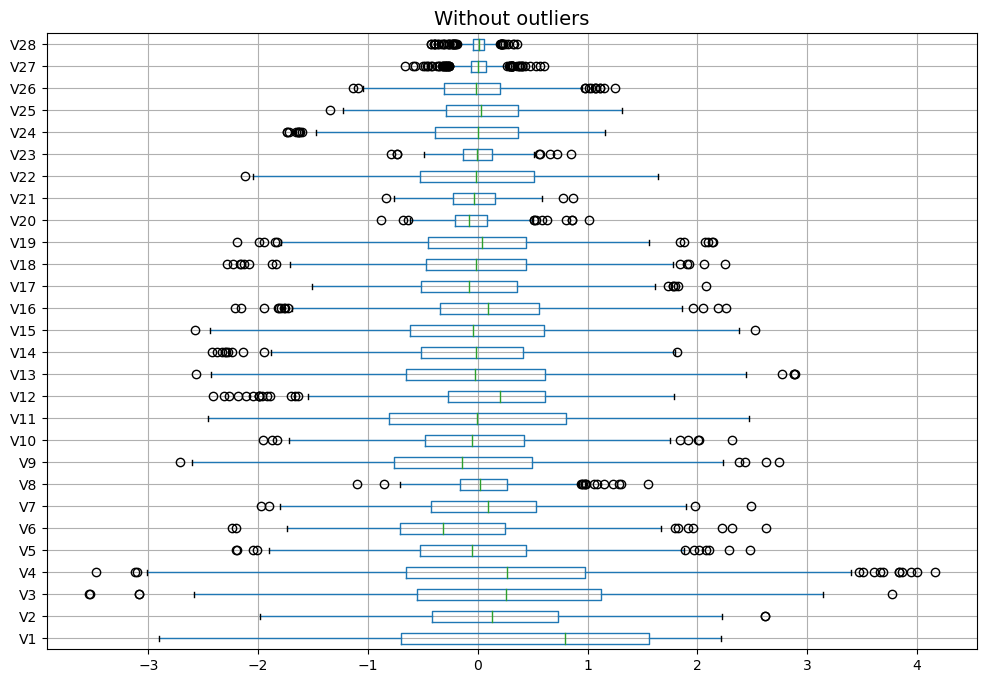

In [53]:
df1_new.loc[:, ~df1_new.columns.isin(['Amount','Time','Class'])].boxplot( figsize=(12,8), vert=False)
plt.title("Without outliers", fontsize=14)
plt.show()

In [54]:
# % of data removed :
print("percentage of records removed is :",(1 - (df1_new.shape[0] / new_df.shape[0]))*100,", it is an accepted % ")

percentage of records removed is : 18.7037037037037 , it is an accepted % 


Distribution of the Classes in the dataset without outliers
0    0.924829
1    0.075171
Name: Class, dtype: float64


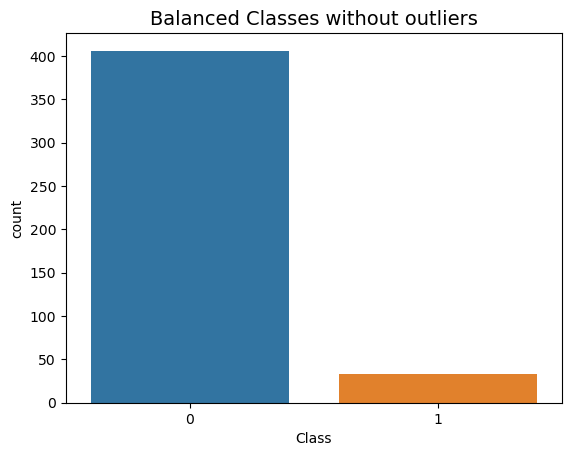

In [70]:
#Plot Distribution of the Classes
print('Distribution of the Classes in the dataset without outliers')
print(df1_new['Class'].value_counts()/len(df1_new))

sns.countplot(x ='Class', data=df1_new)
plt.title('Balanced Classes without outliers', fontsize=14)
plt.show()

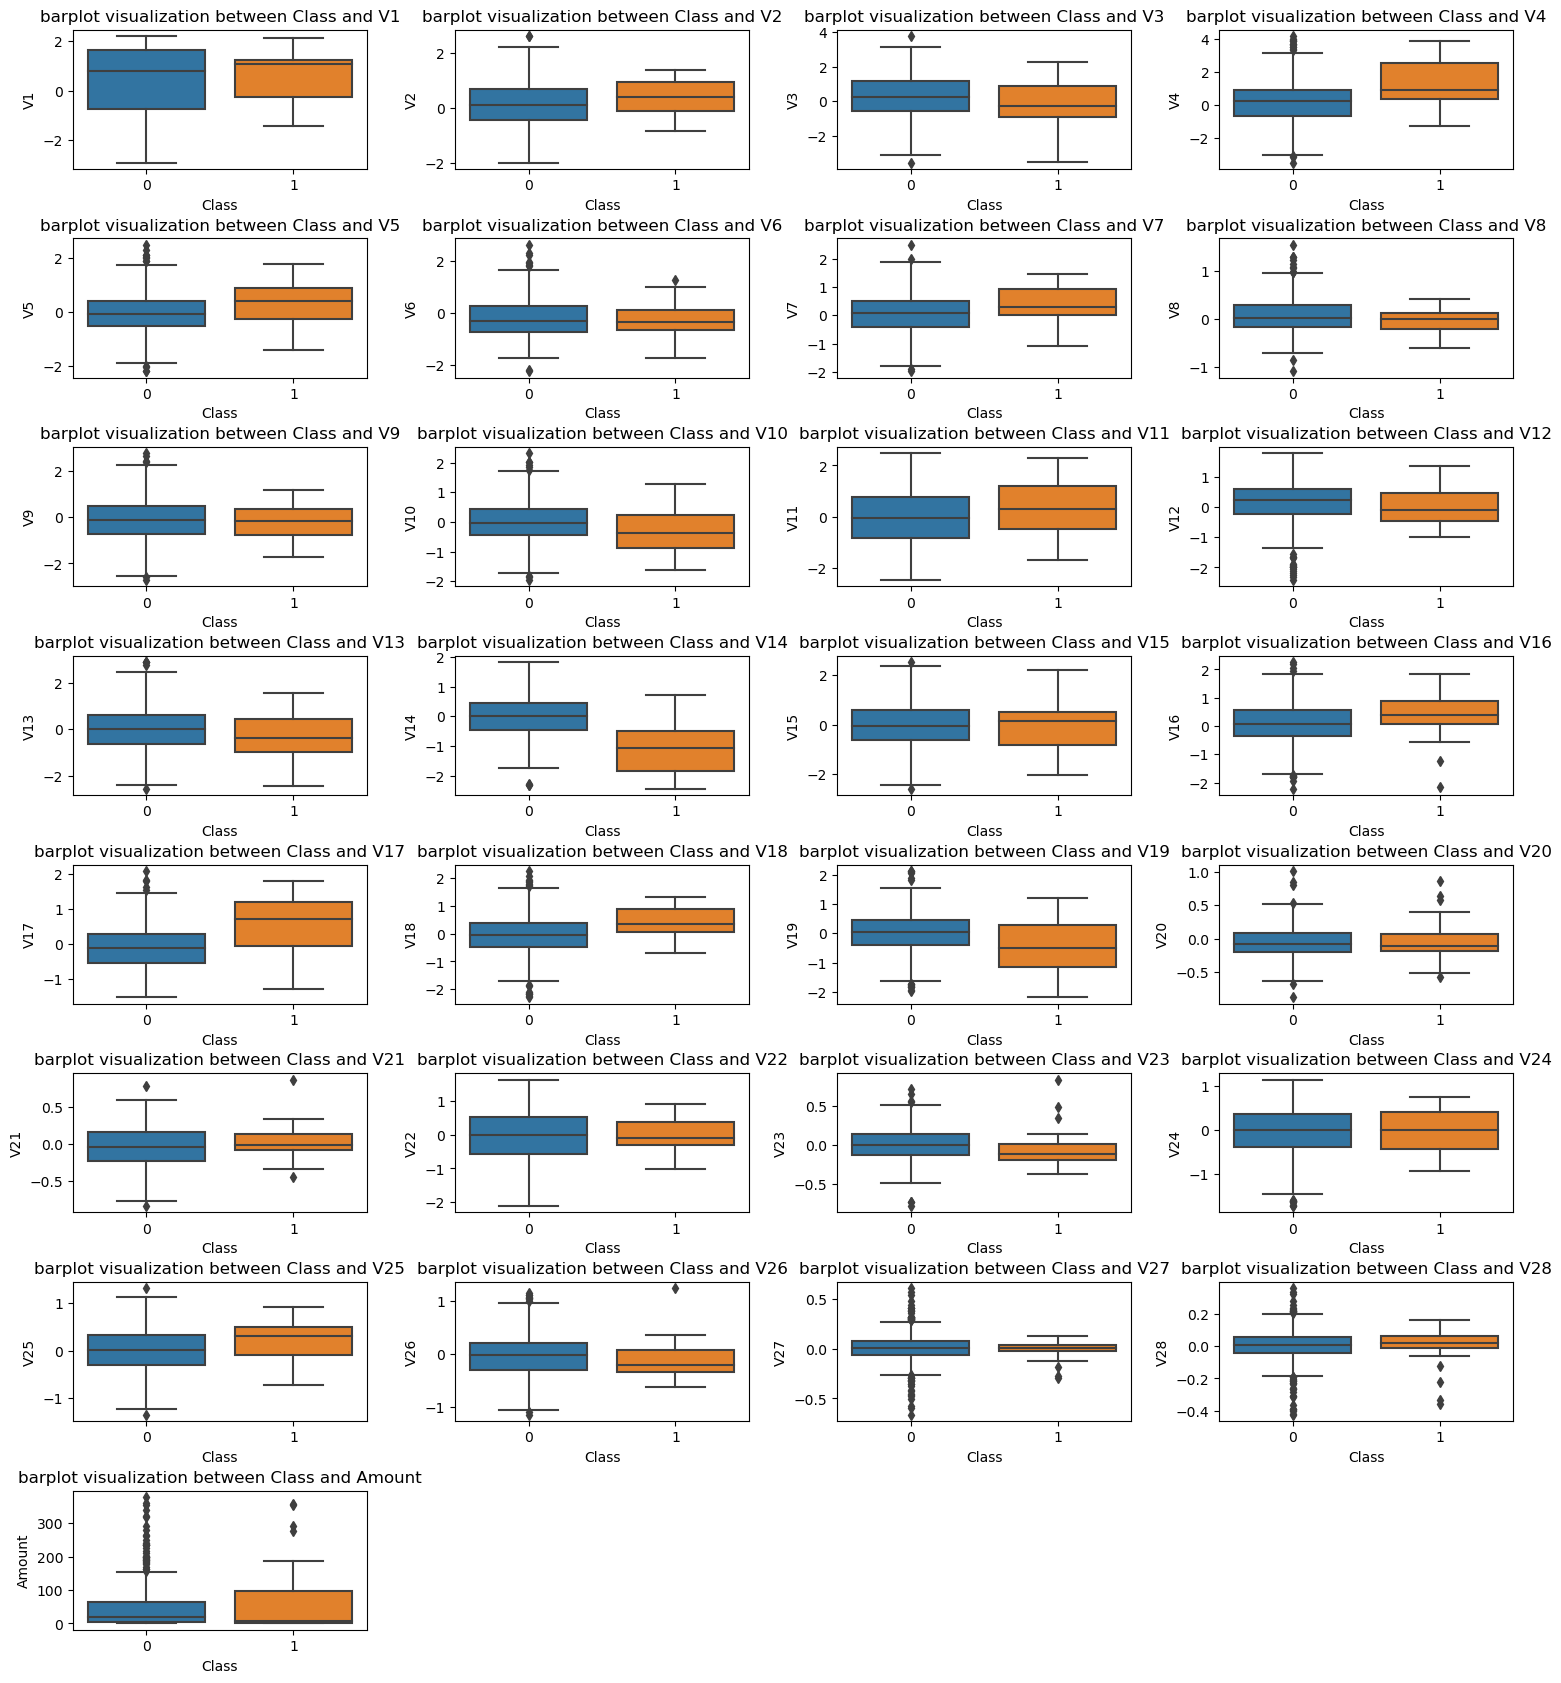

In [72]:
# Visualization of the relation between each variable and Class in a balanced dataset without outliers
x = 0
plt.figure(figsize = [18,20]);
for i in df1_new.loc[:, ~df1_new.columns.isin(['Time','Class'])] :
    plt.subplot(8,4,x+1)
    sns.boxplot(data = df1_new, x = 'Class', y = i)
    plt.title("barplot visualization between Class and {}".format(i), size = 12);
    x = x +1
    plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.3,  
                    hspace=0.5) 
plt.show()

## Machine Learning

In [74]:
dfsp = spark.createDataFrame(new_df)

In [75]:
from pyspark.sql.functions import *
from pyspark.sql.window import Window
win = Window().orderBy('Time')
dfsp = dfsp.withColumn("idx", row_number().over(win))

In [76]:
dfsp.head()

Row(Time=171.0, V1=-0.957819798032566, V2=0.247979462912852, V3=3.77285685226266, V4=3.31138504647662, V5=-1.30542724637226, V6=1.66837856716117, V7=-0.671931222943689, V8=0.453987296034626, V9=0.555107072903718, V10=0.785059044667756, V11=0.0188217794670076, V12=-0.383684430550305, V13=-2.20712311276094, V14=-0.949910908599031, V15=-1.5303996542489, V16=-0.47774006868046, V17=0.56276574343564, V18=0.91927722861292, V19=1.55673679295847, V20=-0.0653134612408482, V21=0.107106382542218, V22=0.866859294191806, V23=-0.43198589024869, V24=0.581400453629233, V25=-0.0157145794209186, V26=0.462414334558448, V27=-0.179223585264262, V28=-0.171543640388857, Amount=71.69, Class=0, idx=1)